In [18]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset

# Display the data table for preview


In [19]:
pyber_data = pd.merge(city_data, ride_data, on="city", how="outer")
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [20]:
urban = pyber_data.loc[pyber_data["type"]== "Urban"]
suburban = pyber_data.loc[pyber_data["type"]== "Suburban"]
rural = pyber_data.loc[pyber_data["type"]== "Rural"]

In [21]:
average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [22]:
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [23]:
total_drivers = pyber_data.groupby("city")["driver_count"].mean()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

## Bubble Plot of Ride Sharing Data

In [24]:
citytype = city_data.set_index('city')['type']
citytype.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [25]:
pyber_cities_df  = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": citytype})
pyber_cities_df.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [26]:
avgfare_urban=urban.groupby(['city'])['fare'].mean()
totalrides_urban=urban.groupby(['city'])['ride_id'].count()
totaldrivers_urban=urban.groupby(['city'])['driver_count'].value_counts()

avgfare_suburban=suburban.groupby(['city'])['fare'].mean()
totalrides_suburban=suburban.groupby(['city'])['ride_id'].count()
totaldrivers_suburban=suburban.groupby(['city'])['driver_count'].value_counts()

avgfare_rural=rural.groupby(['city'])['fare'].mean()
totalrides_rural=rural.groupby(['city'])['ride_id'].count()
totaldrivers_rural=rural.groupby(['city'])['driver_count'].value_counts()

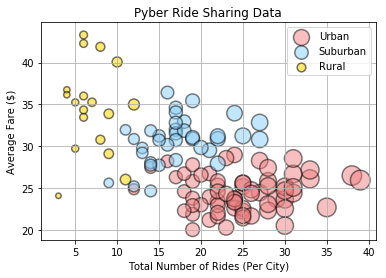

In [27]:
plt.scatter(totalrides_urban, avgfare_urban,s=totaldrivers_urban*10,
            marker ='o', facecolors ="lightcoral",linewidths=1.5, edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(totalrides_suburban, avgfare_suburban,s=totaldrivers_suburban*10,
            marker ='o', facecolors ="lightskyblue",linewidths=1.5, edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(totalrides_rural, avgfare_rural,s=totaldrivers_rural*10,
            marker ='o', facecolors ="gold",linewidths=1.5, edgecolors='black',alpha = 0.55, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")
plt.legend(loc='upper right')
plt.grid()
plt.show()

## Total Fares by City Type

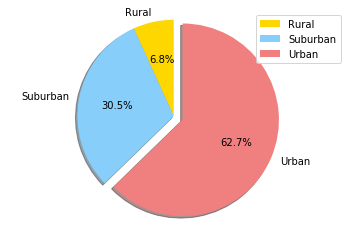

In [35]:
cityfare_pie = pyber_data.groupby(["type"])["fare"].sum()
cityfare_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(cityfare_pie, labels = cityfare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 90)

plt.axis("equal")

plt.legend(loc = "upper right")

plt.show()

## Total Rides by City Type

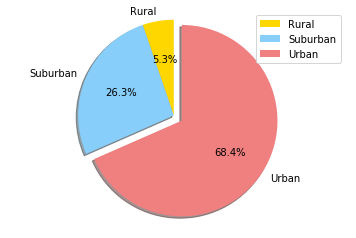

In [38]:
cityrides_pie = pyber_data.groupby(["type"])["ride_id"].count()
cityrides_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(cityrides_pie, labels = cityrides_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 90)

plt.axis("equal")

plt.legend(loc = "upper right")

plt.show()

## Total Drivers by City Type

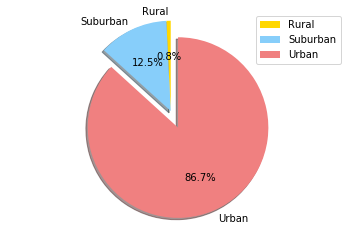

In [51]:
citydrivers_pie = pyber_data.groupby(["type"])["driver_count"].sum()
citydrivers_pie
citydrivers_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.2)
plt.pie(citydrivers_pie, labels = citydrivers_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 90)

plt.axis("equal")

plt.legend(loc = "upper right")

plt.show()